In [2]:
from psycopg2 import connect
import configparser
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker

CONFIG = configparser.ConfigParser()
CONFIG.read('db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

from IPython.display import HTML

def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

# Traffic Volumes - Turning Movement Counts (TMCs) Permanent
# Identifying Extreme Values  

## Visualize data

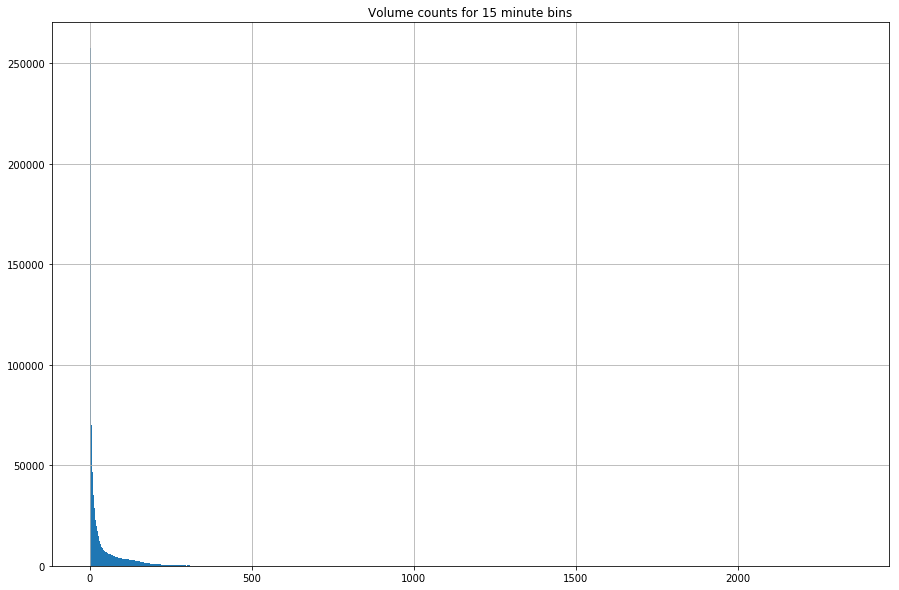

In [3]:
sql_volumes = '''
SELECT volume_15min
FROM open_data.volumes_tmc_permanent
'''
volumes = pandasql.read_sql(sql_volumes, con)


bin_val = np.arange(min(volumes['volume_15min']), max(volumes['volume_15min']), 1)

volumes.hist(bins=bin_val, figsize=(15,10))
plt.title('Volume counts for 15 minute bins')
plt.rc('font', size=10)          
plt.rc('axes', titlesize=15)


In [4]:
# max value is an extreme value 
print(min(volumes['volume_15min']), max(volumes['volume_15min']))

0 2351


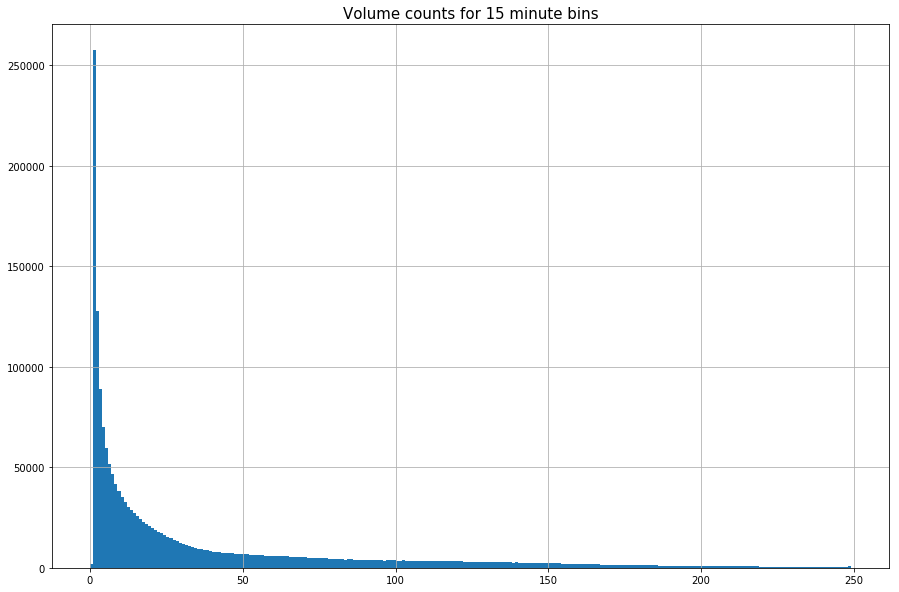

In [6]:
sql_volumes = '''
SELECT volume_15min
FROM open_data.volumes_tmc_permanent
'''
volumes = pandasql.read_sql(sql_volumes, con)


bin_val = np.arange(min(volumes['volume_15min']), 250, 1)

volumes.hist(bins=bin_val, figsize=(15,10))
plt.title('Volume counts for 15 minute bins')
plt.rc('font', size=10)          
plt.rc('axes', titlesize=15)

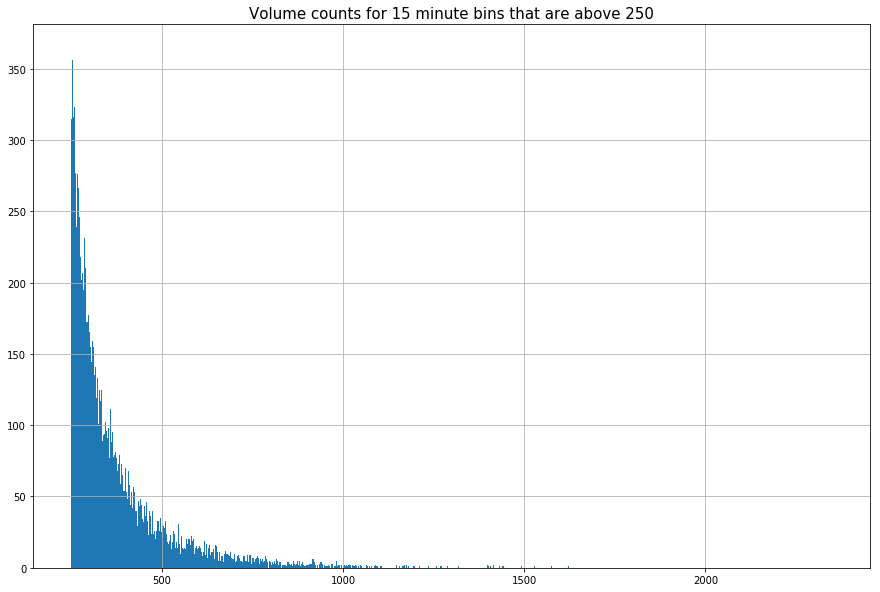

In [7]:
sql_volumes = '''
SELECT volume_15min
FROM open_data.volumes_tmc_permanent
'''
volumes = pandasql.read_sql(sql_volumes, con)


bin_val = np.arange(250, max(volumes['volume_15min']), 1)

volumes.hist(bins=bin_val, figsize=(15,10))
plt.title('Volume counts for 15 minute bins that are above 250')
plt.rc('font', size=10)          
plt.rc('axes', titlesize=15)

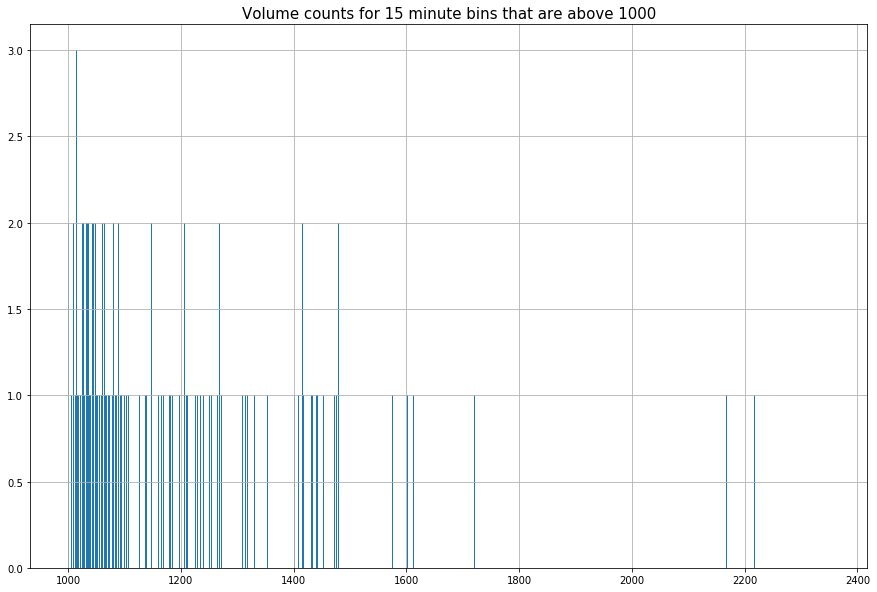

In [8]:
sql_volumes = '''
SELECT volume_15min
FROM open_data.volumes_tmc_permanent
'''
volumes = pandasql.read_sql(sql_volumes, con)


bin_val = np.arange(1000, max(volumes['volume_15min']), 1)

volumes.hist(bins=bin_val, figsize=(15,10))
plt.title('Volume counts for 15 minute bins that are above 1000')
plt.rc('font', size=10)          
plt.rc('axes', titlesize=15)

In [9]:
check_1500 = '''
SELECT * 
FROM open_data.volumes_tmc_permanent
WHERE volume_15min > 1500
'''
pandasql.read_sql(check_1500, con)

,int_id,px,location,class_type,leg,movement,datetime_bin,volume_15min
0,13467389,59,Front / Bay,Pedestrians,W,None,2017-11-06 16:30:00,1575
1,13467389,59,Front / Bay,Pedestrians,W,None,2017-11-06 16:45:00,2351
2,13467389,59,Front / Bay,Pedestrians,W,None,2018-04-10 17:00:00,2167
3,13467389,59,Front / Bay,Pedestrians,W,None,2018-04-11 17:00:00,1720
4,13467389,59,Front / Bay,Pedestrians,W,None,2018-05-28 17:00:00,1515
5,13467389,59,Front / Bay,Pedestrians,E,None,2018-06-20 08:45:00,1601
6,13467389,59,Front / Bay,Pedestrians,W,None,2018-07-20 16:30:00,1817
7,13467389,59,Front / Bay,Pedestrians,W,None,2018-07-20 16:45:00,1551
8,13467389,59,Front / Bay,Pedestrians,W,None,2018-08-21 16:45:00,2217
9,13467163,60,Wellington / Bay,Pedestrians,W,None,2017-10-13 17:15:00,1535


In [10]:
avg_16 = '''
SELECT AVG(volume_15min) FROM open_data.volumes_tmc_permanent
WHERE px = 59 and class_type = 'Pedestrians' and date_part('hour', datetime_bin) = 16
'''

pandasql.read_sql(avg_16, con)

,avg
0,437.105769


In [11]:
avg_17 = '''
SELECT AVG(volume_15min) FROM open_data.volumes_tmc_permanent
WHERE px = 59 and class_type = 'Pedestrians' and date_part('hour', datetime_bin) = 17
'''

pandasql.read_sql(avg_17, con)

,avg
0,459.457692


In [12]:
bay_front_top30 = '''
SELECT * 
FROM open_data.volumes_tmc_permanent
WHERE px = 59 and class_type = 'Pedestrians' and 
(date_part('hour', datetime_bin) = 17 OR date_part('hour', datetime_bin) = 16)
ORDER BY volume_15min DESC
LIMIT 30
'''

pandasql.read_sql(bay_front_top30, con)

,int_id,px,location,class_type,leg,movement,datetime_bin,volume_15min
0,13467389,59,Front / Bay,Pedestrians,W,None,2017-11-06 16:45:00,2351
1,13467389,59,Front / Bay,Pedestrians,W,None,2018-08-21 16:45:00,2217
2,13467389,59,Front / Bay,Pedestrians,W,None,2018-04-10 17:00:00,2167
3,13467389,59,Front / Bay,Pedestrians,W,None,2018-07-20 16:30:00,1817
4,13467389,59,Front / Bay,Pedestrians,W,None,2018-04-11 17:00:00,1720
5,13467389,59,Front / Bay,Pedestrians,W,None,2017-11-06 16:30:00,1575
6,13467389,59,Front / Bay,Pedestrians,W,None,2018-07-20 16:45:00,1551
7,13467389,59,Front / Bay,Pedestrians,W,None,2018-05-28 17:00:00,1515
8,13467389,59,Front / Bay,Pedestrians,S,None,2017-11-08 16:45:00,1442
9,13467389,59,Front / Bay,Pedestrians,W,None,2018-04-11 17:15:00,1431


From the above data, there seems to be a lot of times where the pedestrian counts near the Front/Bay area are above 1000 around 4 or 5 pm in the afternoon. Looking at the above table, large amounts of traffic near that intersection during the hour of 4 or 5 pm is a trend. Therefore the values above 1500 are most likely not extreme/wrong. 

## IQR outlier analysis

In [16]:
sql_volumes = '''
SELECT px, location, class_type, leg, (CASE WHEN movement IS NULL THEN 'None' ELSE movement END) AS movement, 
datetime_bin, volume_15min 
FROM open_data.volumes_tmc_permanent
'''

sql_locations = '''
SELECT DISTINCT ON (px, leg, movement, class_type) px, leg, 
(CASE WHEN movement IS NULL THEN 'None' ELSE movement END) AS movement, class_type
FROM open_data.volumes_tmc_permanent
'''

locations = pandasql.read_sql(sql_locations, con)

In [17]:
volumes = pandasql.read_sql(sql_volumes, con)

In [18]:
final_df = pd.DataFrame(columns=[ 'px', 'location', 'class_type', 'leg', 'movement', 'datetime_bin', 'volume_15min' ])
outliers = pd.DataFrame(columns=[ 'px', 'location', 'class_type', 'leg', 'movement', 'datetime_bin', 'volume_15min' ])


for row in locations.itertuples():
    subset = volumes.loc[ (volumes['px'] == row.px) & (volumes['leg'] == row.leg) & (volumes['movement'] == row.movement)
                        & (volumes['class_type'] == row.class_type)]

    p25, p75 = np.percentile(subset['volume_15min'], 25), np.percentile(subset['volume_15min'], 75)
    iqr = p75 - p25

    # calculate outlier cut off 
    # if volume value is not between lower and upper than it will be considered an outlier
    cut_off = iqr*1.5
    lower, upper = int(p25 - cut_off), int(p75 + cut_off)
    # we cannot have a negative traffic volume
    if lower < 0: 
        lower = 0
    
    # identify outliers
    frames = [outliers, subset.loc[(subset['volume_15min'] < lower) | (subset['volume_15min'] > upper)  ]  ]
    outliers = pd.concat(frames)
    
    
    # all records that are not outliers
    frames = [final_df, subset.loc[(subset['volume_15min'] >= lower) & (subset['volume_15min'] <= upper)]  ]
    final_df = pd.concat(frames)

In [19]:
# get percentage of total records that are outliers 
(len(outliers.index) / len(volumes.index))*100 

3.831853504799402

In [20]:
# QC checks
print((len(outliers.index) + len(final_df.index)) == len(volumes.index))

True


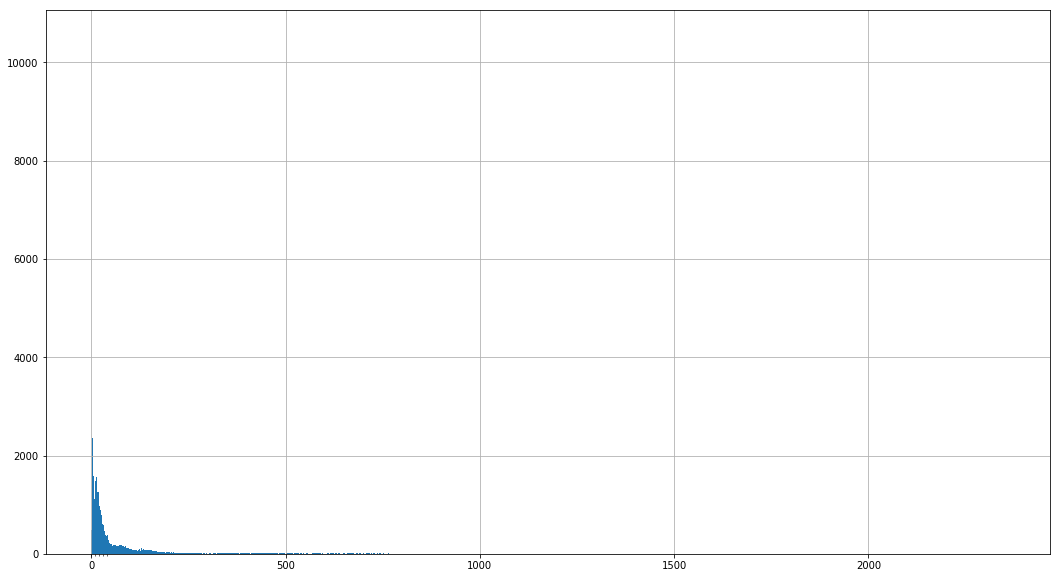

In [21]:
outliers['volume_15min'].hist(bins = np.arange(0, max(outliers['volume_15min']) , 1), figsize = (18, 10))
ax = plt.gca()
minor_ticks = np.arange(0, 50, 10)
major_ticks = np.arange(0, 50, 100)

#ax.set_xticks(major_ticks, labels=[major_ticks])
ax.set_xticks(minor_ticks, minor=True)

## Look at outliers and the 95th percentile values at their locations

In [30]:
# get each location, leg, movement, and class_type, and the 95th percentile of the 15 min bin volumes 
sql_volumes = '''
SELECT px, leg, (CASE WHEN movement IS NULL THEN 'None' ELSE movement END) AS movement, class_type,
PERCENTILE_CONT(0.95) WITHIN GROUP (ORDER BY volume_15min ASC) as percentile_95
FROM open_data.volumes_tmc_permanent
GROUP BY px, location, leg, (CASE WHEN movement IS NULL THEN 'None' ELSE movement END), class_type
'''

percentile_95 = pandasql.read_sql(sql_volumes, con)

In [29]:
# join outlier data frame to data frame with the 95th percentile of locations
pd.merge(outliers, percentile_95, how='inner', on='px')

,px,location,class_type_x,leg_x,movement_x,datetime_bin,volume_15min,leg_y,movement_y,class_type_y,percentile_95
0,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,Left,Cyclists,2.00
1,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,Left,Vehicles,22.00
2,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,None,Cyclists,3.00
3,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,None,Pedestrians,91.00
4,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,Right,Cyclists,2.00
5,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,Right,Vehicles,12.00
6,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,Through,Cyclists,7.00
7,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,E,Through,Vehicles,164.00
8,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,N,Left,Cyclists,2.00
9,2,Front / Jarvis,Cyclists,E,Left,2017-12-09 12:00:00,2,N,Left,Vehicles,12.00


The 95$^{th}$ percentile values at these locations are volumes that may be high or low compared to the other volumes recorded at these locations. However, the volumes are not extreme values (i.e. so high that the volume count would be impossible and that there must have been a malfunction with the volume recording devices). 

## Conclusion 

The above histogram is displaying all of the values that were considered to be outliers. None of these values are "extreme values", the outliers can be attributed to the large variation in volume values. Therefore there are no extremem values to be removed from the TMC permanent dataset. 